## Necessary Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from scipy.optimize import fmin
from pylab import meshgrid
import pandas as pd
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Define Class

In [2]:
class potential_function:
    def __init__(self, initial_data, sigma):
        self.initial_data = initial_data
        self.sigma = sigma
    
    def parzen(self,x):
        temp = 0
        for i in self.initial_data:
            temp += np.e**(-(np.dot(x-i,x-i))*(1/(2*self.sigma**2)))
        return temp

    def value(self,x):
        temp = 0
        for i in self.initial_data:
            temp +=(np.dot(x-i,x-i))*np.e**(-(np.dot(x-i,x-i))*(1/(2*self.sigma**2)))
        temp = (1/(2*self.sigma**2))*(1/self.parzen(x))*temp
        return temp

## 1D Synthetic Data

In [3]:
X_1 = np.random.randn(50)-3
X_2 = np.random.randn(50)+3
X_total = np.concatenate((X_1, X_2))
y_zero = np.zeros(50)
X_lin = np.linspace(-6,6,100)
potential_1d = potential_function(X_total,1)
values = [potential_1d.value(i) for i in X_lin]
center_1 = fmin(potential_1d.value,np.array(-1))
center_2 = fmin(potential_1d.value,np.array(1))
print(center_1,center_2)

Optimization terminated successfully.
         Current function value: 0.216300
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 0.197204
         Iterations: 18
         Function evaluations: 36
[-2.809375] [2.94179688]


## Plot Graph With Minimum

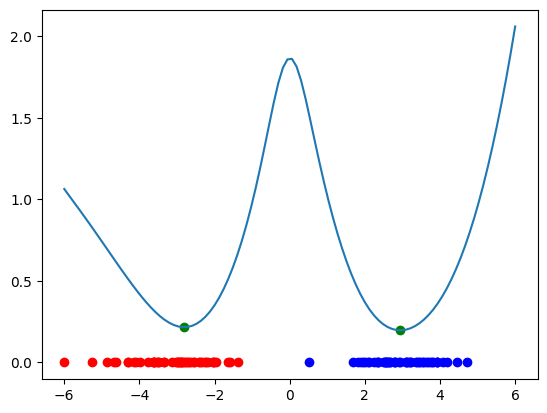

In [4]:
plt.figure
plt.scatter(X_1,y_zero, c = 'red')
plt.scatter(X_2,y_zero, c = 'blue')
plt.plot(X_lin,values)
plt.scatter(center_1,potential_1d.value(center_1), c = 'green')
plt.scatter(center_2,potential_1d.value(center_2), c = 'green')
plt.show()

## 2D Synthetic Data

In [5]:
cov = [[1,0],[0,1]]
X_1 = np.random.multivariate_normal([-2,-2],cov, size = 100)
X_2 = np.random.multivariate_normal([2,2],cov, size = 100)
X_total = np.concatenate((X_1, X_2))
potential_2d = potential_function(X_total,1)
center_1 = fmin(potential_2d.value,np.array([-1,-1]))
center_2 = fmin(potential_2d.value,np.array([1,1]))
print(center_1,center_2)

Optimization terminated successfully.
         Current function value: 0.446064
         Iterations: 43
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.420823
         Iterations: 42
         Function evaluations: 81
[-2.44308683 -1.9928816 ] [2.1941619  2.03342064]


## Plot With Minimum

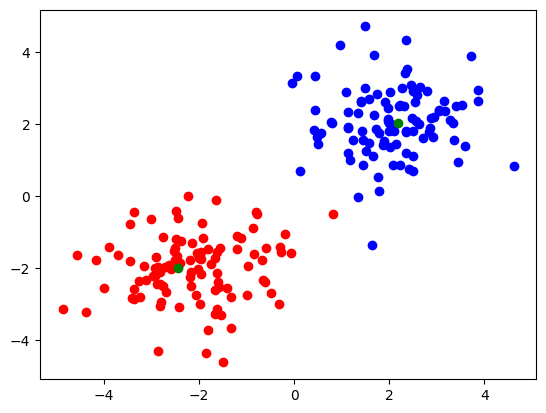

In [6]:
plt.scatter(X_1[:, 0], X_1[:, 1], c ='red')
plt.scatter(X_2[:, 0], X_2[:, 1], c = 'blue')
plt.scatter(center_1[0],center_1[1], c = 'green')
plt.scatter(center_2[0],center_2[1], c = 'green')
plt.show()

## Contour Plot

In [7]:
delta = .25
x_synth = np.arange(-6.0, 6.0, delta)
y_synth = np.arange(-6.0, 6.0, delta)
[X_synth, Y_synth] = np.meshgrid(x_synth, y_synth) 
Z_synth = np.array([[potential_2d.value([i,j]) for i in x_synth]for j in y_synth])

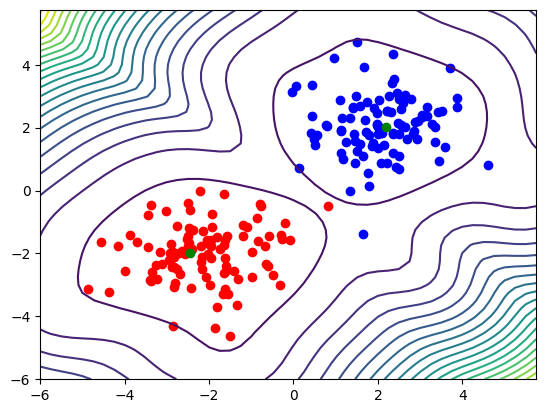

In [8]:
min_value = min(potential_2d.value(center_1),potential_2d.value(center_2))
max_value = max([max(ele) for ele in Z_synth])
levels = np.arange(min_value,max_value, 1)
plt.scatter(X_1[:, 0], X_1[:, 1], c ='red')
plt.scatter(X_2[:, 0], X_2[:, 1], c = 'blue')
plt.scatter(center_1[0],center_1[1], c = 'green')
plt.scatter(center_2[0],center_2[1], c = 'green')
plt.contour(X_synth, Y_synth, Z_synth, levels)
plt.show()

## 3D Plot

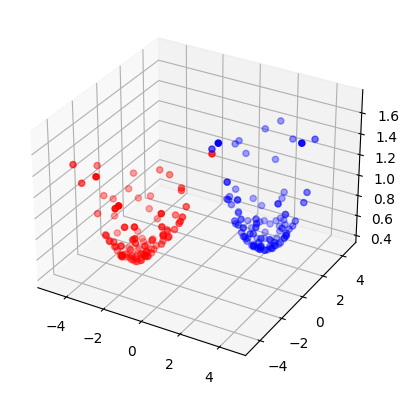

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
values_red = [potential_2d.value(i) for i in X_1]
values_blue = [potential_2d.value(i) for i in X_2]
ax.scatter(X_1[:, 0], X_1[:, 1], values_red, c ='red')
ax.scatter(X_2[:, 0], X_2[:, 1], values_blue, c ='blue')
plt.show()

## 3D Surface Plot

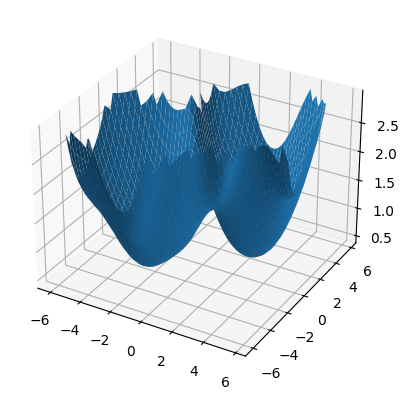

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z_synth[Z_synth>3]= np.nan
ax.plot_surface(X_synth, Y_synth, Z_synth)
plt.show()

## Exploring Crab Dataset
Link to crab dataset: https://www.stats.ox.ac.uk/pub/PRNN/crabs.dat

In [11]:
crabs = pd.read_table("crabs.dat", sep="\s+", usecols=[0,1,3,4,5,6,7], skiprows=1, names=['Sp', 'Sex', 'FL', 'RW', 'CL', 'CW', 'BD'])
crabs['Class'] = (crabs['Sp'] == 'O')*2 + (crabs['Sex']=='F')
crabs.head()

,Sp,Sex,FL,RW,CL,CW,BD,Class
0,B,M,8.1,6.7,16.1,19.0,7.0,0
1,B,M,8.8,7.7,18.1,20.8,7.4,0
2,B,M,9.2,7.8,19.0,22.4,7.7,0
3,B,M,9.6,7.9,20.1,23.1,8.2,0
4,B,M,9.8,8.0,20.3,23.0,8.2,0


## PCA Dimension Reduction

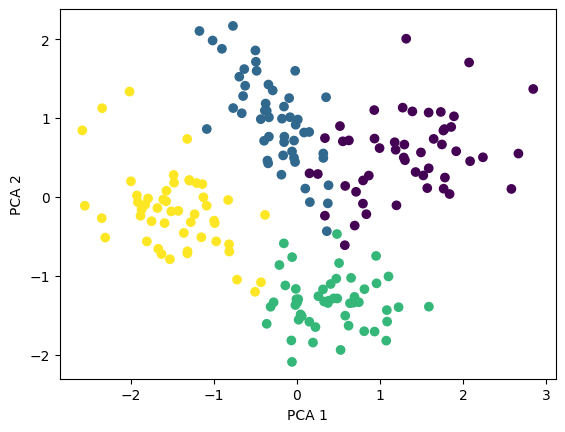

In [12]:
pca = PCA(n_components=crabs['Class'].nunique()) 
features_pca = pca.fit_transform(crabs[['FL', 'RW', 'CL', 'CW', 'BD']])
plt.scatter(features_pca[:, 1],features_pca[:, 2], c=crabs['Class'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## Finding Cluster Centers

Optimization terminated successfully.
         Current function value: 0.502243
         Iterations: 40
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.608804
         Iterations: 39
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.462836
         Iterations: 36
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 0.595510
         Iterations: 36
         Function evaluations: 70


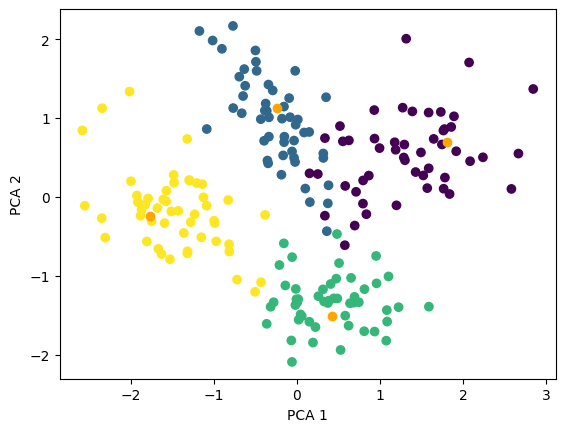

In [13]:
crab_potential = potential_function(features_pca[:,1:3], .75)
test_points = [[-2,-2], [-2,2], [2,-2], [2,2]]
centers = []
for ele in test_points:
    centers.append(fmin(crab_potential.value,np.array(ele)))
plt.scatter(features_pca[:, 1],features_pca[:, 2], c=crabs['Class'])
for ele in centers:
    plt.scatter(ele[0], ele[1], c = 'orange')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## Contour Plot

In [14]:
delta = .1
x_crab = np.arange(-3.0, 3.0, delta)
y_crab = np.arange(-3.0, 3.0, delta)
[X_crab, Y_crab] = np.meshgrid(x_crab, y_crab) 
Z_crab = np.array([[crab_potential.value([i,j]) for i in x_crab]for j in y_crab])

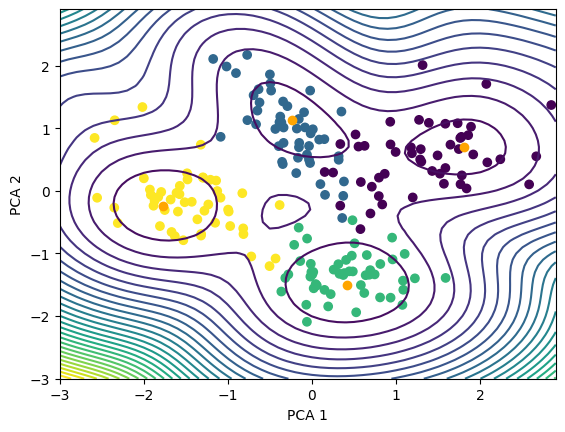

In [15]:
min_value = min([crab_potential.value(ele) for ele in centers])
max_value = max([max(ele) for ele in Z_crab])
levels = np.arange(min_value,max_value, .25)
plt.scatter(features_pca[:, 1],features_pca[:, 2], c=crabs['Class'])
for ele in centers:
    plt.scatter(ele[0], ele[1], c = 'orange')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.contour(X_crab, Y_crab, Z_crab, levels)
plt.show()

## 3D Plot

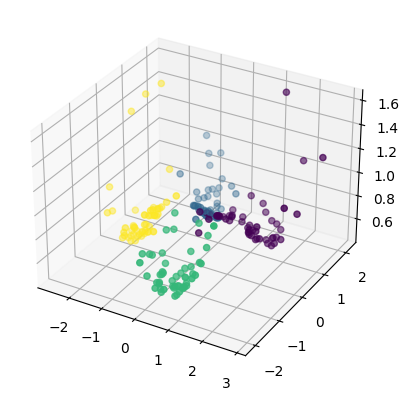

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
values = [crab_potential.value(i) for i in features_pca[:,1:3]]
ax.scatter(features_pca[:,1], features_pca[:,2], values, c=crabs['Class'])
plt.show()

## 3D Surface Plot

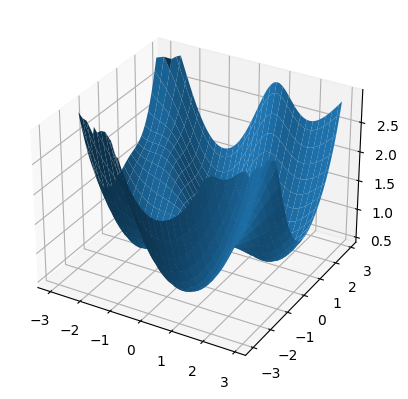

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z_crab[Z_crab>3]= np.nan
ax.plot_surface(X_crab, Y_crab, Z_crab)
plt.show()